In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv('Delhi_Main.csv')

# List of features
features = ['rooms', 'bathroom', 'parking_spaces', 'floor', 'animal_allowance',
            'furniture', 'association_tax', 'rent_amount', 'property_tax', 'fire_insurance', 'total_rent']

# Initialize an empty list to store dictionaries
statistics_list = []

# Loop through each feature and calculate the statistics
for feature in features:
    # Calculate basic statistics
    count = data[feature].count()
    mean = data[feature].mean()
    std = data[feature].std()
    minimum = data[feature].min()
    quartiles = np.percentile(data[feature], [25, 50, 75])
    maximum = data[feature].max()
    
    # Calculate PCS (using skewness as a measure)
    skewness = stats.skew(data[feature])
    
    # Append the statistics as a dictionary to the list
    statistics_list.append({'Feature': feature,
                            'Count': count,
                            'Mean': mean,
                            'Std': std,
                            'Minimum': minimum,
                            '25%': quartiles[0],
                            '50%': quartiles[1],
                            '75%': quartiles[2],
                            'Maximum': maximum,
                            'PCS': skewness})

# Create a DataFrame from the list of dictionaries
statistics_df = pd.DataFrame(statistics_list)

# Display the statistics DataFrame
statistics_df.to_csv('Delhi_Max_min.csv')

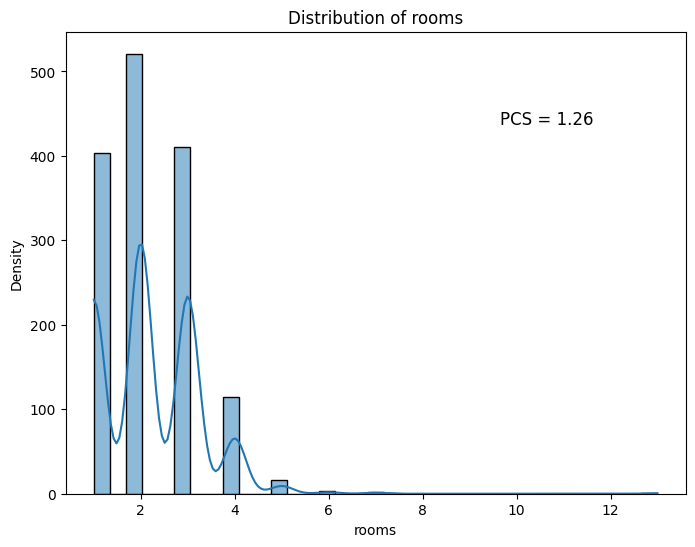

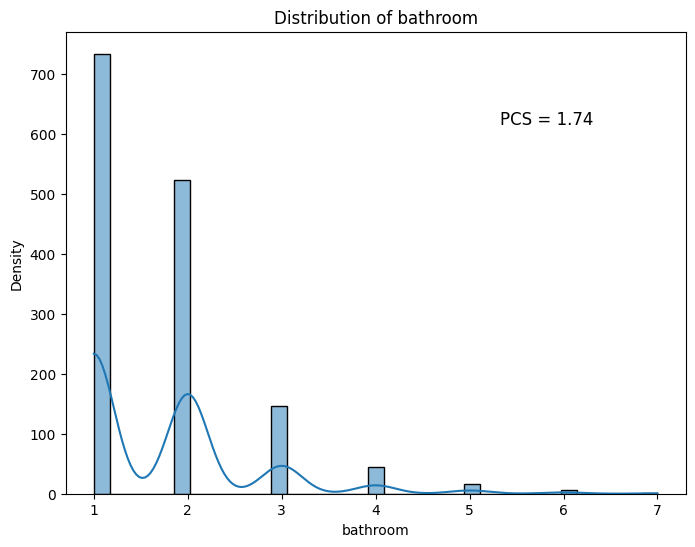

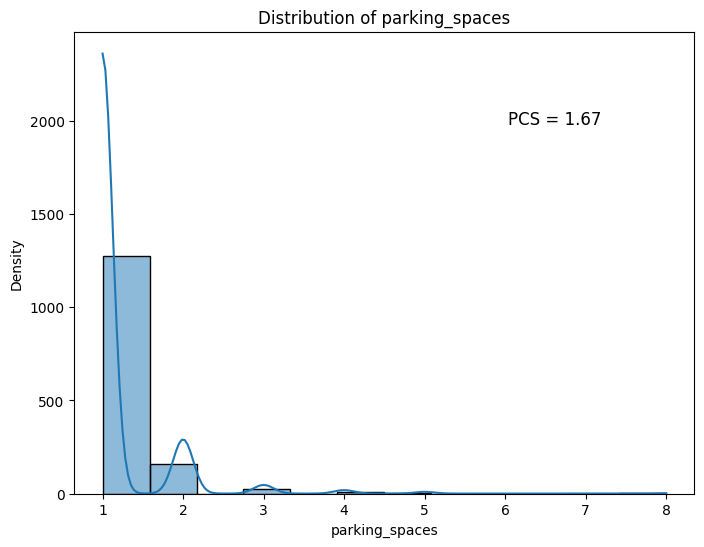

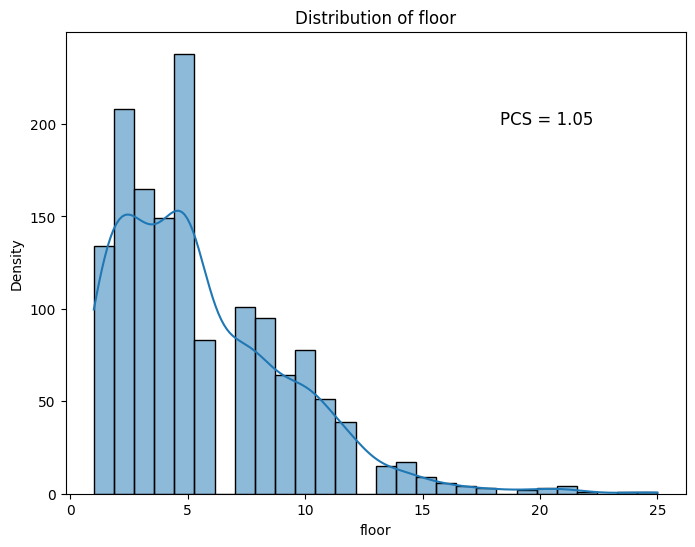

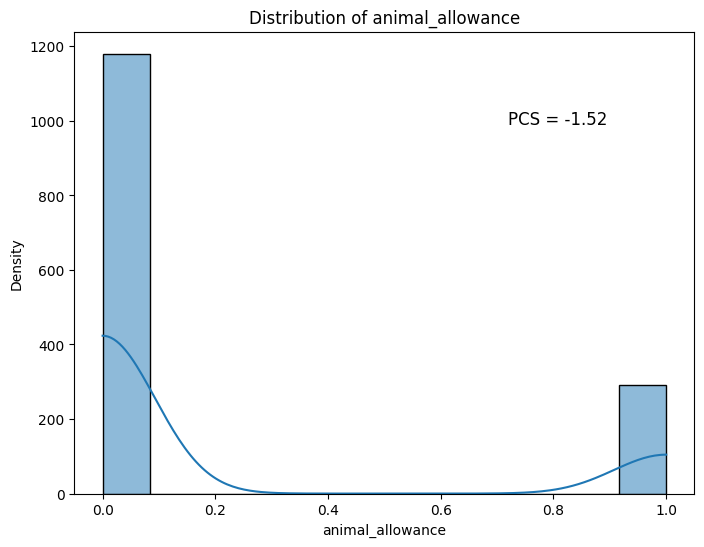

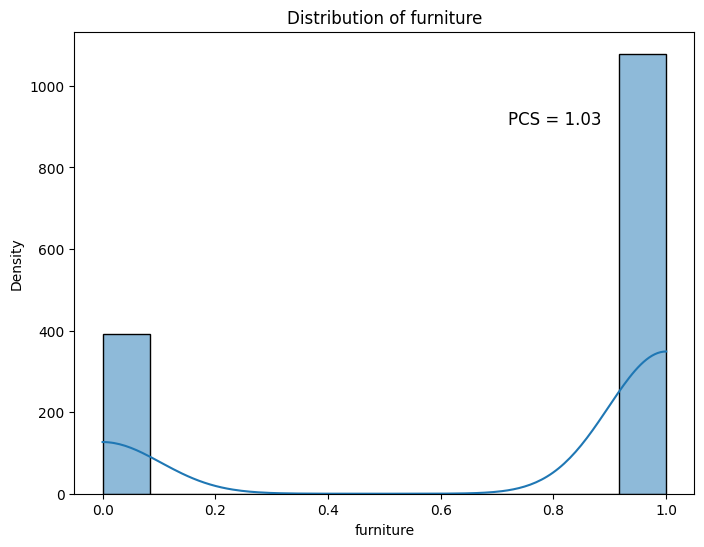

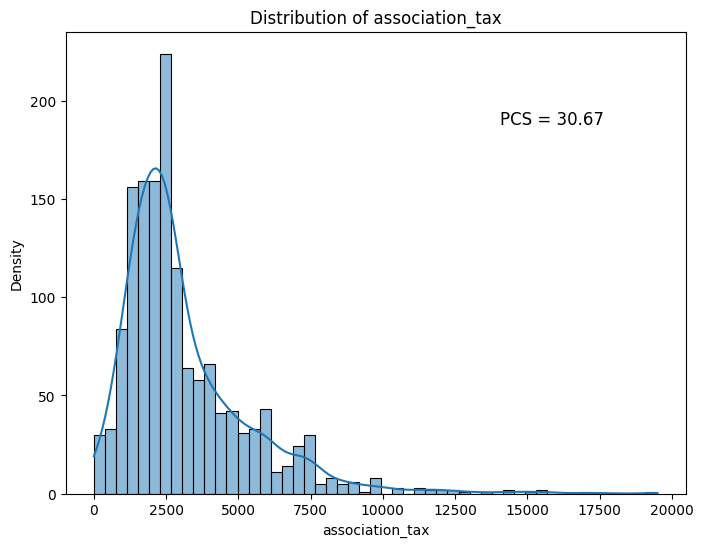

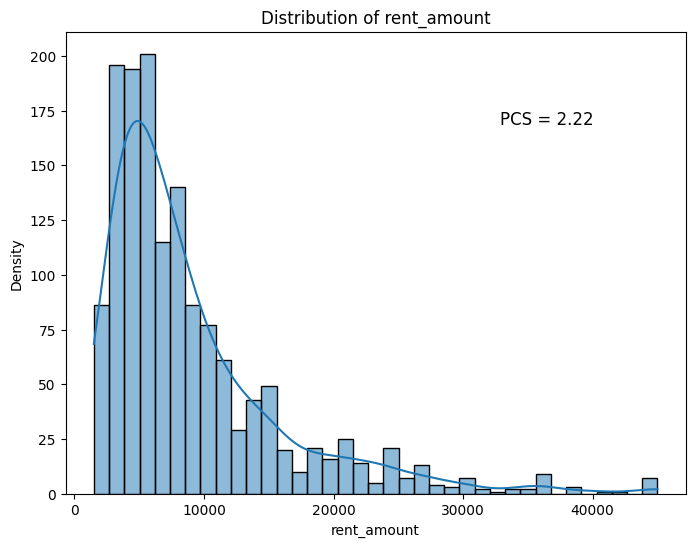

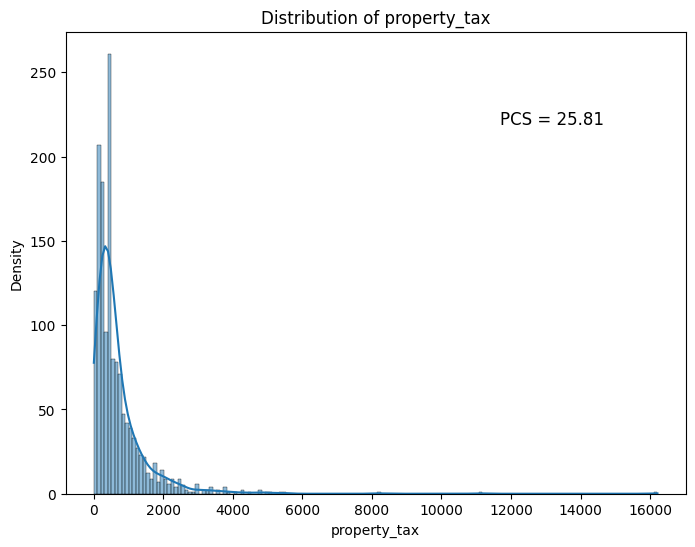

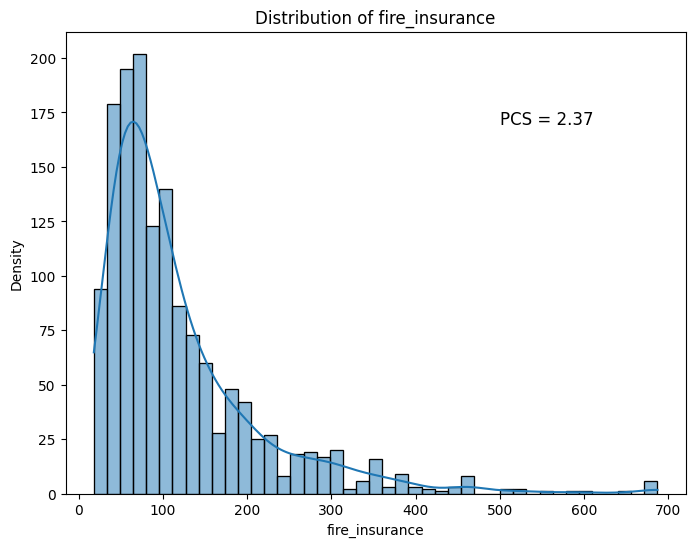

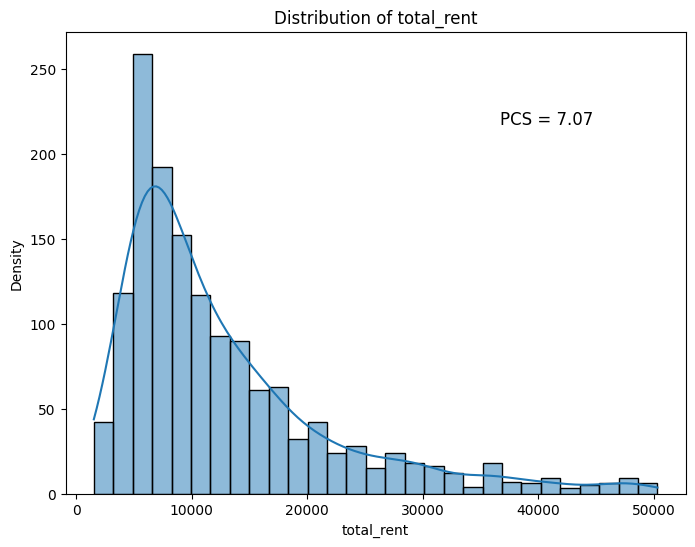

In [2]:
def plot_distribution_with_pcs(data, feature, pcs):
    plt.figure(figsize=(8, 6))
    
    # Create a histogram (density plot)
    sns.histplot(data[feature], kde=True)
    
    # Add PCS value as text on the plot
    plt.text(0.7, 0.8, f'PCS = {pcs:.2f}', transform=plt.gca().transAxes, fontsize=12)
    
    # Set plot labels and title
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature}')
    # Show the plot
    plt.savefig(f"{feature}.png")
    plt.show()

# Loop through each feature and plot its distribution with PCS value
features = [
    'rooms', 'bathroom', 'parking_spaces', 'floor',
    'animal_allowance', 'furniture', 'association_tax',
    'rent_amount', 'property_tax', 'fire_insurance', 'total_rent'
]

pcs_values = [
    1.26, 1.74, 1.67, 1.05, -1.52, 1.03, 30.67, 2.22, 25.81, 2.37, 7.07
]

for feature, pcs in zip(features, pcs_values):
    plot_distribution_with_pcs(data, feature, pcs)


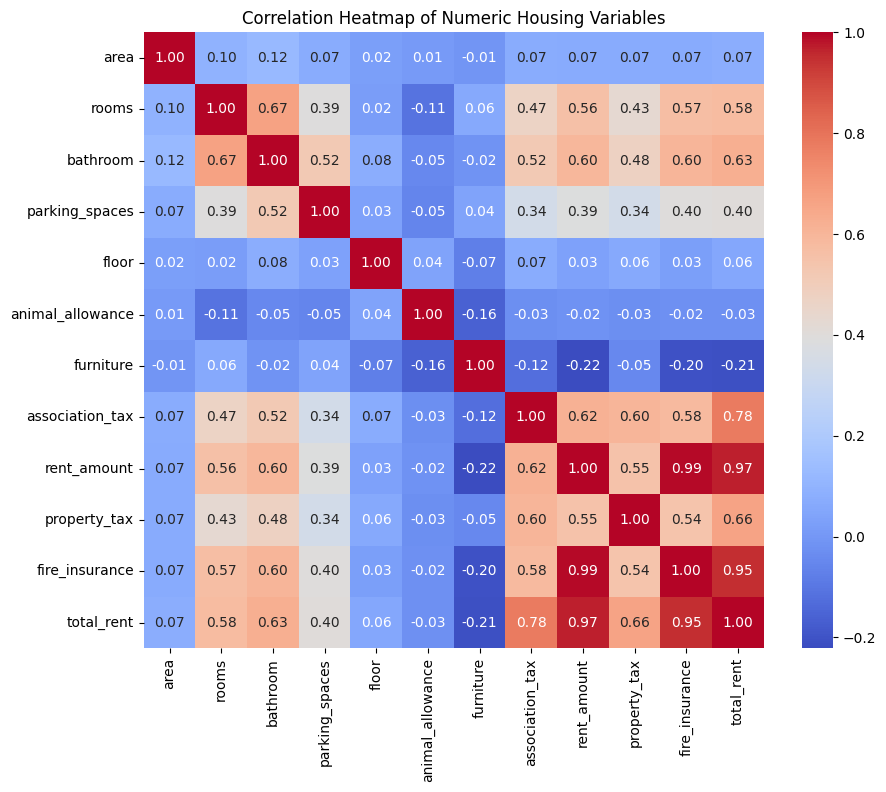

In [3]:
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Housing Variables')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [4]:
X = data.drop(columns = ['rent_amount','total_rent'])
X

,area,rooms,bathroom,parking_spaces,floor,animal_allowance,furniture,association_tax,property_tax,fire_insurance
0,114,3,4,2,7,0,0,3630,1107,582
1,153,3,4,2,5,0,1,9000,1425,504
2,78,4,3,3,10,0,1,9750,5505,441
3,217,5,3,2,5,0,1,2511,3750,687
4,170,3,3,2,2,0,0,19500,5040,312
...,...,...,...,...,...,...,...,...,...,...
1466,31,1,1,1,2,0,1,2511,471,24
1467,42,1,1,1,4,0,1,150,471,24
1468,42,1,1,1,4,0,1,150,471,24
1469,140,1,1,1,3,0,1,2511,471,21


In [5]:
y = data['total_rent']
y

0       50310
1       49920
2       49710
3       49440
4       48840
        ...  
1466     1824
1467     1824
1468     1824
1469     1521
1470     1521
Name: total_rent, Length: 1471, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)

In [1]:
plt.scatter(y_train, y_pred_train,alpha = .35)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Chagres')
slope = lr.coef_[8]  # Get the slope (coefficient)
intercept = lr.intercept_  # Get the intercept
plt.savefig('regression.png')
plt.show()

NameError: name 'plt' is not defined

In [9]:
intercept
slope

df = pd.DataFrame(lr.coef_,X.columns.values)
df.to_csv("regration_eq.csv")
